In [58]:
import cv2
import numpy
from matplotlib import pyplot as plt 

def hole_filling_filter(mat: numpy.ndarray):
    for y in range(mat.shape[0]):
        for x in range(mat.shape[1]-2, -1, -1):
            if mat[y,x] == 0:
                mat[y,x] = mat[y,x+1]
    
    return mat

w = 424
h = 240
pov = 84

delay_per_mm = .25/1000

maxdepth = 5000

array = numpy.fromfile("C:\\Users\\theod\\source\\repos\\thesis\\r-tests\\hallway1_Depth.raw", numpy.int16)
array = numpy.reshape(array, [h, w])
array[array>maxdepth] = maxdepth
array = cv2.medianBlur(array, 5)
array = hole_filling_filter(array)

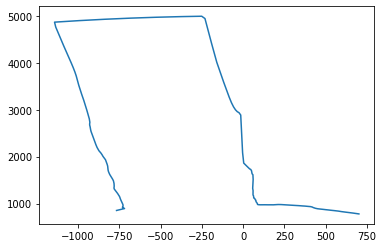

In [59]:
midrow = array[int(h/2)]

thetas = numpy.linspace(-pov/2, pov/2, w)
rads = thetas * numpy.pi / 180

x = numpy.sin(rads) * midrow
y = numpy.cos(rads) * midrow

plt.plot(x,y)
plt.show()

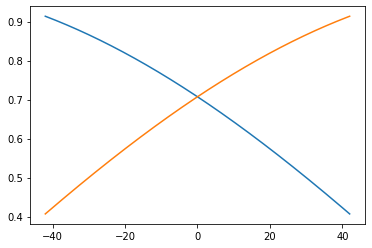

In [57]:
left_power = numpy.sqrt(2)/2*(numpy.cos(rads/2) - numpy.sin(rads/2))
right_power = numpy.sqrt(2)/2*(numpy.sin(rads/2) + numpy.cos(rads/2))
plt.plot(thetas, left_power)
plt.plot(thetas, right_power)
plt.show()

In [66]:
delays = midrow*delay_per_mm

NameError: name 'j' is not defined

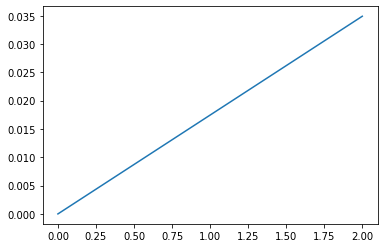

In [72]:
fs = 44100
t = numpy.linspace(0, 2, fs)
example_sound = numpy.sin(t*numpy.pi/180)
plt.plot(t, example_sound)